## HW2
## Yarou Xu

### 1. Autoencoder

In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import SimpleRNN, LSTM, Embedding
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model, Sequential
from keras.preprocessing import sequence
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.applications import VGG19
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\47532\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
# Prepare dataset, split it into training and test set
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [3]:
# Encoder
input_img = Input(shape=(X_train.shape[1:]))
x = Conv2D(filters = 32, kernel_size = (3,3),
           activation='relu',padding='same')(input_img)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(filters = 16, kernel_size = (3,3),
           activation='relu',padding='same')(x)
x = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(filters = 8, kernel_size = (3,3),
           activation='relu',padding='same')(x)
encoded = MaxPooling2D(pool_size = (2,2), padding = 'same')(x)

In [7]:
# Decoder
x = Conv2D(filters = 8, kernel_size = (3,3), 
           activation = 'relu', padding = 'same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(filters = 16, kernel_size = (3,3), 
           activation = 'relu', padding = 'same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(filters = 32, kernel_size = (3,3), 
           activation = 'relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(filters = 1, kernel_size = (3,3), 
                 activation = 'sigmoid', padding = 'same')(x)

In [8]:
# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [9]:
# Use earlystopping to avoid over-fitting
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=0,
                              verbose=0, mode='auto')
# Train on trainig set
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=256,
                callbacks=[earlyStopping],
                shuffle=True,
                validation_data=(X_test, X_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 154s 3ms/step - loss: 0.3653 - val_loss: 0.3323
Epoch 2/20
60000/60000 [==============================] - 158s 3ms/step - loss: 0.3224 - val_loss: 0.3159
Epoch 3/20
60000/60000 [==============================] - 158s 3ms/step - loss: 0.3121 - val_loss: 0.3133
Epoch 4/20
60000/60000 [==============================] - 159s 3ms/step - loss: 0.3066 - val_loss: 0.3082
Epoch 5/20
60000/60000 [==============================] - 158s 3ms/step - loss: 0.3026 - val_loss: 0.3006
Epoch 6/20
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2993 - val_loss: 0.3000
Epoch 7/20
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2973 - val_loss: 0.2996
Epoch 8/20
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2956 - val_loss: 0.2971
Epoch 9/20
60000/60000 [==============================] - 161s 3ms/step - loss: 0.2940 - val_loss: 0.2

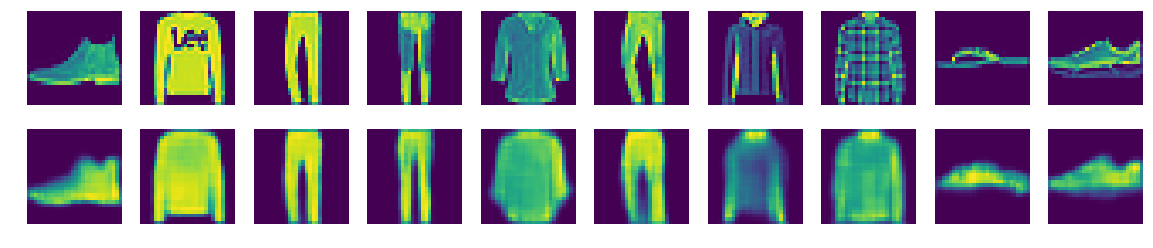

In [10]:
# Perform on test set
decoded_images = autoencoder.predict(X_test)
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.axis("off")
    # Autoencoder image
    ax = plt.subplot(2,n,i+n+1)
    plt.imshow(decoded_images[i].reshape(28,28))
    plt.axis("off")

## 2.  Image Classification
### 2.1 Deep CNN

In [12]:
# Build a deep CNN
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),
                activation = 'relu', strides = (1,1),
                padding = 'valid',
                input_shape = (X_train.shape[1:])))
print(model.output_shape)
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),
                activation = 'relu', strides = (2,2),
                padding = 'valid'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))
print(model.summary())

(None, 26, 26, 64)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 32)          18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                9248      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0 

#### This CNN contains 2 converlutional layers, 2 max pooling layers, 1 drop out layer, 1 flatten layer, and 2 dense layers. It's total 8 layrs. For the first converlutional layer, there are 64 kernels with kernel size 3 by 3, no padding, and the stride is 1 by 1. For the second converlutional layer, there are 32 kernels with kernel size 3 by 3, no padding, and the stride is 2 by 2. For both max pooling layers, the pooling size is 2 by 2.

In [14]:
# Train on training data
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.fit(X_train, Y_train,
         epochs = 20,
         batch_size = 128)


Epoch 1/20
60000/60000 [==============================] - 33s 557us/step - loss: 0.3168 - acc: 0.8858
Epoch 2/20
60000/60000 [==============================] - 34s 573us/step - loss: 0.3050 - acc: 0.8901
Epoch 3/20
60000/60000 [==============================] - 35s 581us/step - loss: 0.2976 - acc: 0.8927
Epoch 4/20
60000/60000 [==============================] - 35s 585us/step - loss: 0.2919 - acc: 0.8957
Epoch 5/20
60000/60000 [==============================] - 35s 590us/step - loss: 0.2887 - acc: 0.8954
Epoch 6/20
60000/60000 [==============================] - 36s 594us/step - loss: 0.2791 - acc: 0.8991
Epoch 7/20
60000/60000 [==============================] - 36s 593us/step - loss: 0.2743 - acc: 0.8998
Epoch 8/20
60000/60000 [==============================] - 36s 595us/step - loss: 0.2690 - acc: 0.9010
Epoch 9/20
60000/60000 [==============================] - 36s 596us/step - loss: 0.2650 - acc: 0.9022
Epoch 10/20
60000/60000 [==============================] - 36s 597us/step - loss: 

#### For this deep CNN model, the classification accuracy on the training set is 0.9147.

In [15]:
# Evaluate the CNN on test set
score = model.evaluate(X_test, Y_test, verbose = 1)
print(score)

10000/10000 [==============================] - 2s 193us/step
[0.2677203505754471, 0.9075]


#### The classification accuracy on the test set is 0.9075, which is a little bit lower than that of the training set. 

In [16]:
# compute the cross table
import pandas as pd
pred_classes = model.predict_classes(X_test[:1024], 
                                          batch_size = 128,
                                          verbose = 1)
pd.crosstab(pred_classes, y_test[:1024],
           rownames = ['Predicted Class'], colnames = ['True Class'])

1024/1024 [==============================] - 0s 274us/step


True Class,0,1,2,3,4,5,6,7,8,9
Predicted Class,,,,,,,,,,
0,94,0,4,5,0,0,8,0,0,0
1,0,105,0,1,0,0,0,0,0,0
2,3,0,99,0,6,0,6,0,0,0
3,2,1,0,82,3,0,2,0,0,0
4,0,0,4,2,100,0,5,0,0,0
5,0,0,0,0,0,87,0,1,1,1
6,8,0,7,4,5,0,78,0,1,0
7,0,0,0,0,0,3,0,96,0,4
8,2,0,0,2,1,0,0,0,96,0


### 2.2 Transfer Learning

In [17]:
#from skimage.transform import resize
import cv2
# Prepare the train and test dataset for the pretrained VGG19 model
(x_train_rgb, y_train_rgb), (x_test_rgb, y_test_rgb) = fashion_mnist.load_data()
# convert the gray-scale dataset to RGB with size 48*48*3
x_train_rgb = [cv2.cvtColor(cv2.resize(i, (48,48)), cv2.COLOR_GRAY2BGR) for i in x_train_rgb]
x_train_rgb = np.concatenate([arr[np.newaxis] for arr in x_train_rgb]).astype('float32')/255

x_test_rgb = [cv2.cvtColor(cv2.resize(i, (48,48)), cv2.COLOR_GRAY2BGR) for i in x_test_rgb]
x_test_rgb = np.concatenate([arr[np.newaxis] for arr in x_test_rgb]).astype('float32')/255

#X_train_r = resize(X_train_r, (X_train_r.shape[0],48,48))
#X_test_r = resize(X_test_r, (X_test_r.shape[0],48,48))
#X_train_r = X_train_r.reshape(X_train_r.shape[0], 48, 48, 1).astype('float32') / 255
#X_test_r = X_test_r.reshape(X_test_r.shape[0], 48, 48, 1).astype('float32') / 255


#X_train_r = np.concatenate((X_train_r, X_train_r, X_train_r), axis=3) 
#X_test_r = np.concatenate((X_test_r, X_test_r, X_test_r), axis=3) 

Y_train_rgb = np_utils.to_categorical(y_train_rgb, 10)
Y_test_rgb = np_utils.to_categorical(y_test_rgb, 10)
print(x_train_rgb.shape)
print(x_test_rgb.shape)
print(Y_train_rgb.shape)
print(Y_test_rgb.shape)

(60000, 48, 48, 3)
(10000, 48, 48, 3)
(60000, 10)
(10000, 10)


In [18]:
conv_base = VGG19(weights='imagenet', include_top = False, input_shape=(x_train_rgb.shape[1:]))

In [19]:
transfer_model = Sequential()
transfer_model.add(conv_base)
transfer_model.add(Flatten())
transfer_model.add(Dense(256, activation = 'relu'))
transfer_model.add(Dropout(0.25))
transfer_model.add(Dense(128, activation = 'relu'))
transfer_model.add(Dropout(0.25))
transfer_model.add(Dense(10, activation = 'softmax'))
transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total para

In [20]:
# Visualize all the weights in the VGG19 model
transfer_model.trainable_weights

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/kernel:0' shape=(3, 3, 64, 64) dtype=float32_ref>,
 <tf.Variable 'block1_conv2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/kernel:0' shape=(3, 3, 64, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/kernel:0' shape=(3, 3, 128, 128) dtype=float32_ref>,
 <tf.Variable 'block2_conv2/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/kernel:0' shape=(3, 3, 128, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv2/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'block3_conv3/kernel:0' shape=(3, 3, 256, 256) dtype=float32_ref>,
 <tf.Variable 'block3_conv3

In [21]:
# Freeze all weights in VGG19 other than the final layer
conv_base.trainable = False

In [22]:
transfer_model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [24]:
transfer_model.fit(x_train_rgb, Y_train_rgb,
         epochs = 20,
         batch_size = 256)

Epoch 1/20
60000/60000 [==============================] - 1431s 24ms/step - loss: 0.5849 - acc: 0.7916
Epoch 2/20
60000/60000 [==============================] - 1422s 24ms/step - loss: 0.4610 - acc: 0.8349
Epoch 3/20
60000/60000 [==============================] - 1411s 24ms/step - loss: 0.4168 - acc: 0.8491
Epoch 4/20
60000/60000 [==============================] - 1409s 23ms/step - loss: 0.3898 - acc: 0.8599
Epoch 5/20
60000/60000 [==============================] - 1409s 23ms/step - loss: 0.3727 - acc: 0.8645
Epoch 6/20
60000/60000 [==============================] - 1409s 23ms/step - loss: 0.3539 - acc: 0.8712
Epoch 7/20
60000/60000 [==============================] - 1410s 24ms/step - loss: 0.3430 - acc: 0.8754
Epoch 8/20
60000/60000 [==============================] - 1410s 23ms/step - loss: 0.3338 - acc: 0.8783
Epoch 9/20
60000/60000 [==============================] - 1408s 23ms/step - loss: 0.3256 - acc: 0.8809
Epoch 10/20
60000/60000 [==============================] - 1412s 24ms/ste

#### For this transfer learning model, the classification accuracy on training set is 0.9009.

In [28]:
# #valuate the model on test set
score = transfer_model.evaluate(x_test_rgb, Y_test_rgb, verbose = 1)
print(score)

10000/10000 [==============================] - 222s 22ms/step
[0.33561757991313934, 0.8785]


#### The classification accuracy on test set is only 0.8785, which is much lower than that of the training set. This could be caused by overfitting.

In [29]:
# compute the cross table
import pandas as pd
pred_classes = transfer_model.predict_classes(x_test_rgb[:1024], 
                                          batch_size = 128,
                                          verbose = 1)
pd.crosstab(pred_classes, y_test_rgb[:1024],
           rownames = ['Predicted Class'], colnames = ['True Class'])

1024/1024 [==============================] - 21s 20ms/step


True Class,0,1,2,3,4,5,6,7,8,9
Predicted Class,,,,,,,,,,
0,98,0,2,4,0,0,8,0,0,0
1,0,104,0,3,0,0,0,0,0,0
2,2,0,94,1,6,0,5,0,0,0
3,1,2,2,80,7,0,5,0,1,0
4,2,0,11,4,97,0,16,0,1,0
5,0,0,0,0,0,87,0,3,0,1
6,5,0,5,4,5,0,65,0,0,0
7,0,0,0,0,0,4,0,91,0,4
8,1,0,0,0,0,0,0,0,95,0


## 3. Text Classification

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read in the data 
benign = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt')
malicious = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt')
benign['class'] = [1]*len(benign)
malicious['class'] = [0]*len(malicious)
print(len(benign))
print(len(malicious))
# Split it into train and test dataset
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(benign.iloc[:,0], benign['class'], test_size=0.2)
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(malicious.iloc[:,0], malicious['class'], test_size=0.2)
X_train = pd.concat([X_train_b,X_train_m]).reset_index(drop=True)
Y_train = pd.concat([Y_train_b,Y_train_m]).reset_index(drop=True)
X_test = pd.concat([X_test_b,X_test_m]).reset_index(drop=True)
Y_test = pd.concat([Y_test_b, Y_test_m]).reset_index(drop=True)

# Shuffle the index 
idx1 = np.random.permutation(X_train.index)
X_train = X_train.reindex(idx1, axis = 0)
Y_train = np.array(Y_train.reindex(idx1, axis = 0))
idx2 = np.random.permutation(X_test.index)
X_test = X_test.reindex(idx2, axis = 0)
Y_test = np.array(Y_test.reindex(idx2, axis = 0))

print(X_train.shape)
print(X_test.shape)

66056
1295
(53880,)
(13471,)


In [31]:
# Calculate the number of characters
chars = []
maxlen = 0
for i in range(len(X_train)):
    maxlen = max(maxlen,len(X_train.iloc[i]))
    for char in X_train.iloc[i]:
        if char not in chars:
            chars.append(char)
for i in range(len(X_test)):
    maxlen = max(maxlen,len(X_test.iloc[i]))
    for char in X_test.iloc[i]:
        if char not in chars:
            chars.append(char)            

max_features = len(chars)
print(max_features)
print(maxlen)

69
86


In [33]:
# Word to id
word2id = {}
for i in range(max_features):
    word2id[chars[i]] = i+1
input_train = []
for i in range(len(X_train)):
    input_sent = []
    for char in X_train.iloc[i]:
        input_sent.append(word2id.get(char))
    input_train.append(input_sent)
# Compute the training input length
print("The length of the training input is :")
print(input_train.__len__())

print("One sample of the training input is :")
print(input_train[0])

input_test = []
for i in range(len(X_test)):
    input_sent = []
    for char in X_test.iloc[i]:
        input_sent.append(word2id.get(char))
    input_test.append(input_sent)
# Compute the test input length
print("The length of the test input is :")
print(input_test.__len__())

The length of the training input is :
53880
One sample of the training input is :
[1, 2, 3, 4, 3, 1, 4, 3, 5, 1, 6, 7, 8, 9, 10, 11, 10, 12, 4, 1, 8, 10, 6]
The length of the test input is :
13471


In [34]:
# padding the input sentences so that they have same length
input_train = sequence.pad_sequences(input_train, maxlen)
input_test = sequence.pad_sequences(input_test, maxlen)

# Compute the training input shape
print(input_train.shape)

# Print ont sample of the training input after padding
print(input_train[0])

# Compute the test input shape
print(input_test.shape)

(53880, 86)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  3  4  3  1  4  3  5
  1  6  7  8  9 10 11 10 12  4  1  8 10  6]
(13471, 86)


In [36]:
# Geerate a two-layers lstm model
lstm = Sequential()
lstm.add(Embedding(max_features+1,64))
lstm.add(LSTM(32,return_sequences=True))
lstm.add(LSTM(16))
lstm.add(Dense(1,activation = 'sigmoid'))
lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          4480      
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 32)          12416     
_________________________________________________________________
lstm_4 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 20,049
Trainable params: 20,049
Non-trainable params: 0
_________________________________________________________________


In [37]:
lstm.compile(optimizer = 'rmsprop', 
             loss = 'binary_crossentropy', 
             metrics = ['acc'])
lstm.fit(input_train,Y_train, epochs = 15, batch_size = 128)

Epoch 1/15
53880/53880 [==============================] - 30s 558us/step - loss: 0.0839 - acc: 0.98060s - loss: 0.0855 
Epoch 2/15
53880/53880 [==============================] - 29s 534us/step - loss: 0.0287 - acc: 0.9865
Epoch 3/15
53880/53880 [==============================] - 30s 550us/step - loss: 0.0250 - acc: 0.9883
Epoch 4/15
53880/53880 [==============================] - 30s 556us/step - loss: 0.0229 - acc: 0.9887
Epoch 5/15
53880/53880 [==============================] - 31s 567us/step - loss: 0.0219 - acc: 0.9894
Epoch 6/15
53880/53880 [==============================] - 31s 574us/step - loss: 0.0213 - acc: 0.9895
Epoch 7/15
53880/53880 [==============================] - 31s 580us/step - loss: 0.0206 - acc: 0.9902
Epoch 8/15
53880/53880 [==============================] - 31s 578us/step - loss: 0.0202 - acc: 0.9902
Epoch 9/15
53880/53880 [==============================] - 32s 588us/step - loss: 0.0197 - acc: 0.9908
Epoch 10/15
53880/53880 [==============================] - 32s 5

#### For this LSTM model, the classification accuracy on the training set is 0.9917.

In [38]:
# Evaluage the model on the test set
score = lstm.evaluate(input_test, Y_test, verbose = 1)
print(score)

13471/13471 [==============================] - 4s 320us/step
[0.023134635685953506, 0.9883453344220919]


#### The classication accuracy on the test set is 0.9883.

### 3.2. CNN

In [44]:
# Generate a CNN model
cnn = Sequential()
cnn.add(Embedding(max_features+1, 64, input_length = maxlen))
cnn.add(Conv1D(filters = 128, kernel_size = 5, activation = 'relu'))
cnn.add(Dropout(0.25))
cnn.add(MaxPooling1D(pool_size = 4))
cnn.add(Flatten())
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dense(32, activation = 'relu'))
cnn.add(Dense(1, activation = 'sigmoid'))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 86, 64)            4480      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 82, 128)           41088     
_________________________________________________________________
dropout_8 (Dropout)          (None, 82, 128)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 20, 128)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                163904    
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
__________

In [45]:
# Train on training set
cnn.compile(optimizer = 'rmsprop', 
             loss = 'binary_crossentropy', 
             metrics = ['acc'])
cnn.fit(input_train,Y_train, epochs = 15, validation_split = 0.2, batch_size = 128)

Train on 43104 samples, validate on 10776 samples
Epoch 1/15
43104/43104 [==============================] - 24s 559us/step - loss: 0.0633 - acc: 0.9795 - val_loss: 0.0271 - val_acc: 0.9874
Epoch 2/15
43104/43104 [==============================] - 24s 550us/step - loss: 0.0236 - acc: 0.9892 - val_loss: 0.0345 - val_acc: 0.9849
Epoch 3/15
43104/43104 [==============================] - 24s 547us/step - loss: 0.0195 - acc: 0.9912 - val_loss: 0.0223 - val_acc: 0.9891
Epoch 4/15
43104/43104 [==============================] - 24s 555us/step - loss: 0.0178 - acc: 0.9919 - val_loss: 0.0282 - val_acc: 0.9879
Epoch 5/15
43104/43104 [==============================] - 24s 563us/step - loss: 0.0159 - acc: 0.9928 - val_loss: 0.0292 - val_acc: 0.9890
Epoch 6/15
43104/43104 [==============================] - 25s 570us/step - loss: 0.0145 - acc: 0.9936 - val_loss: 0.0324 - val_acc: 0.9889
Epoch 7/15
43104/43104 [==============================] - 25s 584us/step - loss: 0.0134 - acc: 0.9941 - val_loss: 0.

#### For this CNN model, the classification accuracy on training set is 0.9981.

In [47]:
# Evaluate the model on test set
score = cnn.evaluate(input_test, Y_test, verbose = 1)
print(score)

13471/13471 [==============================] - 2s 161us/step
[0.04072437338001954, 0.9908692747383268]


#### The classification accuracy on test set is 0.9909.

### 3.3. Compare two methods with ROC curves

In [49]:
lstm_pred_class = lstm.predict_classes(input_test, 
                                          batch_size = 128,
                                          verbose = 1)
cnn_pred_class = cnn.predict_classes(input_test, 
                                          batch_size = 128,
                                          verbose = 1)

13471/13471 [==============================] - 2s 147us/step


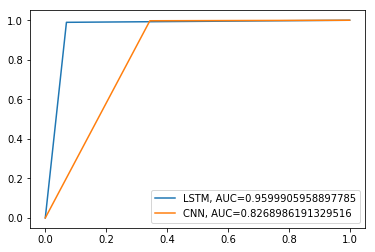

In [50]:
# Compare two models with their ROC curves and AUC
from sklearn import metrics
lstm_fpr, lstm_tpr, lstm_ = metrics.roc_curve(Y_test, lstm_pred_class)
lstm_auc = metrics.roc_auc_score(Y_test, lstm_pred_class)
cnn_fpr, cnn_tpr, cnn_ = metrics.roc_curve(Y_test, cnn_pred_class)
cnn_auc = metrics.roc_auc_score(Y_test, cnn_pred_class)
plt.plot(lstm_fpr, lstm_tpr, label = 'LSTM, AUC=' + str(lstm_auc))
plt.plot(cnn_fpr, cnn_tpr, label = 'CNN, AUC=' + str(cnn_auc))
plt.legend(loc = 4)

#### From above analysis we know that the benign and malicious data size is very unbalanced. Although the classification accuracy scores for both LSTM and CNN model are high, the AUC of CNN model is not as good as its accuracy, which means that many malicious links are classified as benign. 

#### Next we will retrain these two model on justified dataset with balanced size for both classes.

In [51]:
# Sample from the benign data so that it has similar size of data with the malicious one
benign1 = benign.sample(n=5000)
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(benign1.iloc[:,0], benign1['class'], test_size=0.2)
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(malicious.iloc[:,0], malicious['class'], test_size=0.2)
X_train = pd.concat([X_train_b,X_train_m]).reset_index(drop=True)
Y_train = pd.concat([Y_train_b,Y_train_m]).reset_index(drop=True)
X_test = pd.concat([X_test_b,X_test_m]).reset_index(drop=True)
Y_test = pd.concat([Y_test_b, Y_test_m]).reset_index(drop=True)

# Shuffle the index 
idx1 = np.random.permutation(X_train.index)
X_train = X_train.reindex(idx1, axis = 0)
Y_train = np.array(Y_train.reindex(idx1, axis = 0))
idx2 = np.random.permutation(X_test.index)
X_test = X_test.reindex(idx2, axis = 0)
Y_test = np.array(Y_test.reindex(idx2, axis = 0))

print(X_train.shape)
print(X_test.shape)
#df = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))

(5036,)
(1259,)


In [52]:
input_train = []
for i in range(len(X_train)):
    input_sent = []
    for char in X_train.iloc[i]:
        input_sent.append(word2id.get(char))
    input_train.append(input_sent)
print(input_train.__len__())
print(input_train[0])
input_test = []
for i in range(len(X_test)):
    input_sent = []
    for char in X_test.iloc[i]:
        input_sent.append(word2id.get(char))
    input_test.append(input_sent)
print(input_test.__len__())

5036
[1, 9, 23, 18, 18, 18, 11, 32, 18, 10, 5, 14, 15, 11, 32, 15, 11, 1, 5, 10, 10, 5, 33, 15, 31, 7, 2, 15, 10, 1, 8, 10, 6]
1259


In [53]:
# padding the input sentences so that they have same length
input_train = sequence.pad_sequences(input_train, maxlen)
input_test = sequence.pad_sequences(input_test, maxlen)
print(input_train.shape)
print(input_train[0])
print(input_test.shape)

(5036, 86)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  9 23 18 18 18 11 32 18 10  5 14 15 11 32 15 11  1  5
 10 10  5 33 15 31  7  2 15 10  1  8 10  6]
(1259, 86)


In [54]:
lstm.fit(input_train,Y_train, epochs = 15, batch_size = 128)

Epoch 1/15
5036/5036 [==============================] - 3s 580us/step - loss: 0.0521 - acc: 0.9877
Epoch 2/15
5036/5036 [==============================] - 3s 572us/step - loss: 0.0446 - acc: 0.9891
Epoch 3/15
5036/5036 [==============================] - 3s 575us/step - loss: 0.0408 - acc: 0.9891
Epoch 4/15
5036/5036 [==============================] - 3s 574us/step - loss: 0.0403 - acc: 0.9893
Epoch 5/15
5036/5036 [==============================] - 3s 583us/step - loss: 0.0397 - acc: 0.9905
Epoch 6/15
5036/5036 [==============================] - 3s 576us/step - loss: 0.0385 - acc: 0.9899
Epoch 7/15
5036/5036 [==============================] - 3s 678us/step - loss: 0.0380 - acc: 0.9905
Epoch 8/15
5036/5036 [==============================] - 3s 654us/step - loss: 0.0369 - acc: 0.9899
Epoch 9/15
5036/5036 [==============================] - 3s 628us/step - loss: 0.0371 - acc: 0.9901
Epoch 10/15
5036/5036 [==============================] - 3s 597us/step - loss: 0.0374 - acc: 0.9897
Epoch 11/

#### After adjusting the data size, the classification accuracy of LSTM model on training set is 0.9913.

In [55]:
# Evaluage the model on the test set
score = lstm.evaluate(input_test, Y_test, verbose = 1)
print(score)

1259/1259 [==============================] - 0s 326us/step
[0.08463339158717574, 0.9793486894360603]


#### The accuracy score for the test set is 0.9793.

In [57]:
cnn.fit(input_train,Y_train, epochs = 15, validation_split = 0.2, batch_size = 128)

Train on 4028 samples, validate on 1008 samples
Epoch 1/15
4028/4028 [==============================] - 2s 545us/step - loss: 0.0084 - acc: 0.9980 - val_loss: 0.0374 - val_acc: 0.9931
Epoch 2/15
4028/4028 [==============================] - 2s 540us/step - loss: 0.0062 - acc: 0.9995 - val_loss: 0.0449 - val_acc: 0.9931
Epoch 3/15
4028/4028 [==============================] - 2s 547us/step - loss: 0.0107 - acc: 0.9973 - val_loss: 0.0455 - val_acc: 0.9901
Epoch 4/15
4028/4028 [==============================] - 2s 541us/step - loss: 0.0057 - acc: 0.9993 - val_loss: 0.0517 - val_acc: 0.9891
Epoch 5/15
4028/4028 [==============================] - 2s 548us/step - loss: 0.0072 - acc: 0.9983 - val_loss: 0.0467 - val_acc: 0.9921
Epoch 6/15
4028/4028 [==============================] - 2s 554us/step - loss: 0.0063 - acc: 0.9993 - val_loss: 0.0470 - val_acc: 0.9931
Epoch 7/15
4028/4028 [==============================] - 2s 556us/step - loss: 0.0057 - acc: 0.9993 - val_loss: 0.0511 - val_acc: 0.9921


#### The classification accuracy of CNN model on training set is 0.9990.

In [58]:
# Evaluate the model on test set
score = cnn.evaluate(input_test, Y_test, verbose = 1)
print(score)

1259/1259 [==============================] - 0s 187us/step
[0.1260983126964396, 0.9817315329626688]


#### The classification accuracy of CNN model on test set is 0.9817.

In [59]:
# Predict the class for test inputs
lstm_pred_class = lstm.predict_classes(input_test, 
                                          batch_size = 128,
                                          verbose = 1)
# Predict the class for test inputs
cnn_pred_class = cnn.predict_classes(input_test, 
                                          batch_size = 128,
                                          verbose = 1)

1259/1259 [==============================] - 0s 136us/step


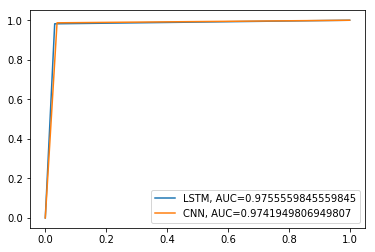

In [60]:
# Compare two models with their ROC curves and AUC
from sklearn import metrics
lstm_fpr, lstm_tpr, lstm_ = metrics.roc_curve(Y_test, lstm_pred_class)
lstm_auc = metrics.roc_auc_score(Y_test, lstm_pred_class)
cnn_fpr, cnn_tpr, cnn_ = metrics.roc_curve(Y_test, cnn_pred_class)
cnn_auc = metrics.roc_auc_score(Y_test, cnn_pred_class)
plt.plot(lstm_fpr, lstm_tpr, label = 'LSTM, AUC=' + str(lstm_auc))
plt.plot(cnn_fpr, cnn_tpr, label = 'CNN, AUC=' + str(cnn_auc))
plt.legend(loc = 4)

#### After increase the ratio of malicious data over benign data, the LSTM model and the CNN model both perform very well on accuracy and AUC score. It means that these two model can correctly classify both benign web links and malicious ones when the two dataset have similar size.